In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns", None)

In [22]:
bank = pd.read_csv("../data/bank.csv")

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37444 non-null  float64
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  float64
 5   housing         40198 non-null  float64
 6   loan            40198 non-null  float64
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        5625 non-null   float64
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  36040 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [23]:
num_var = bank.columns[bank.dtypes != "object"].to_list()
num_var.pop(num_var.index("y"))
cate_var = bank.columns[bank.dtypes == "object"].to_list()
print(f'{len(num_var)}, {len(cate_var)}')

13, 6


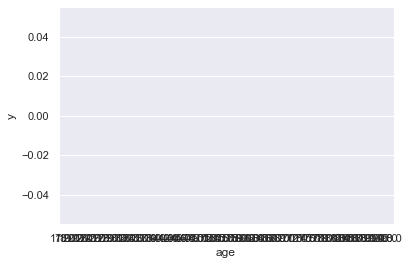

In [18]:
bank["y"] = bank["y"].map({1: "yes", 0: "no"})

for col in num_var:
    sns.stripplot(x = "age", y = "y", data = bank, jitter = True)

## Correlation Heatmap
There are too many variables, it's hard to read.
More detailed and readable plots will follow.
**However, from the graph, it still can be seen that most variables are not correlated with other variables.**

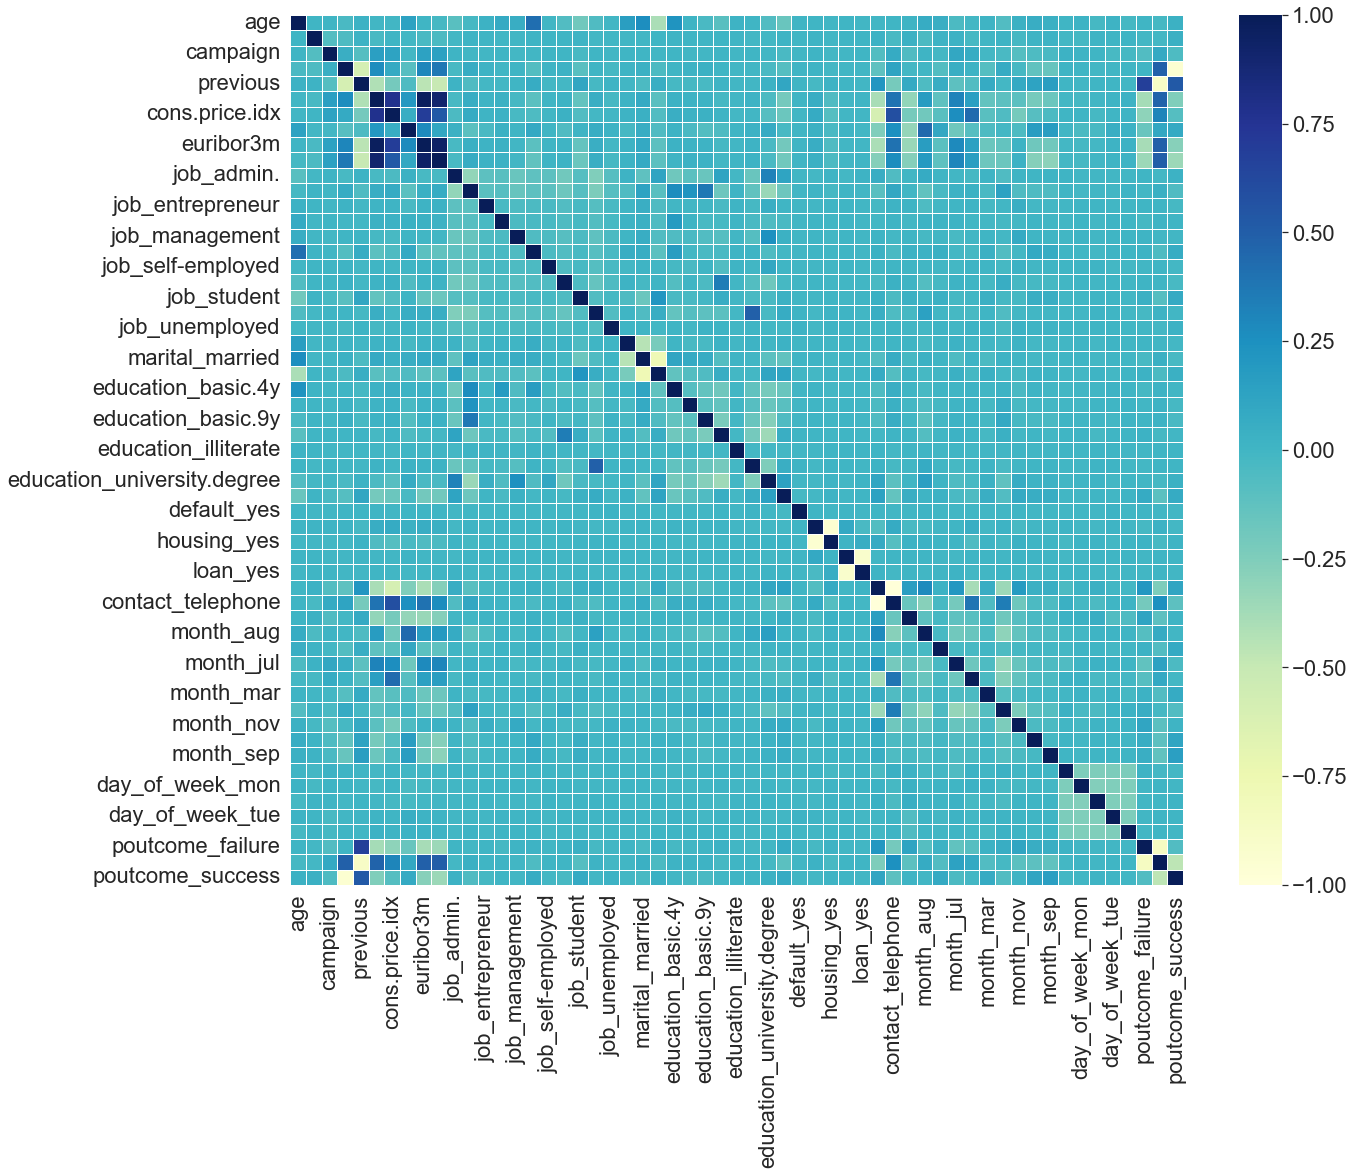

In [8]:
bank_flattened = pd.read_csv("../data/bank_imputed_knn.csv")

plt.figure(figsize = (20, 16))
sns.set(font_scale = 2)
sns.heatmap(bank_flattened.corr(), cmap = "YlGnBu", linewidth = 1)
plt.show()